## Import libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Define filepath

file_path = '/Users/daphne/Downloads/DY_6.1/Prepared Data/DY_Chocolate_Ratings_clean1.xlsx'

In [3]:
# Import file

df = pd.read_excel(file_path)

In [4]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
year_counts = df['Review Date'].value_counts()

year_counts

2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review Date, dtype: int64

I did not make a subset. I considered removing 2017 from the 'Review Date' column because there are only 24 counts which is disproportionate compared to the other years. Although, I think keeping that column in is fine based on the variables I will use in this exercise. There is also no relevant historical information that affects the accuracy of the time data in this dataset. 

In [6]:
# Set 'Review Date' as the index

df.set_index('Review Date', inplace=True)

In [7]:
# Convert the index to datetime

df.index = pd.to_datetime(df.index, format='%Y')

In [8]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin,Reference #,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
Review Date,,,,,,,,
2016-01-01,A. Morin,Agua Grande,1876,63%,France,3.75,,Sao Tome
2015-01-01,A. Morin,Kpime,1676,70%,France,2.75,,Togo
2015-01-01,A. Morin,Atsane,1676,70%,France,3.00,,Togo
2015-01-01,A. Morin,Akata,1680,70%,France,3.50,,Togo
2015-01-01,A. Morin,Quilla,1704,70%,France,3.50,,Peru


## Line chart

In [9]:
# Removing % from 'Cocoa Percent' so it can be treated at numeric

df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype('float')

In [10]:
# Group by year and find the average 'Cocoa Percent' for each year

avg_cocoa_per_year = df.groupby(df.index)['Cocoa Percent'].mean()

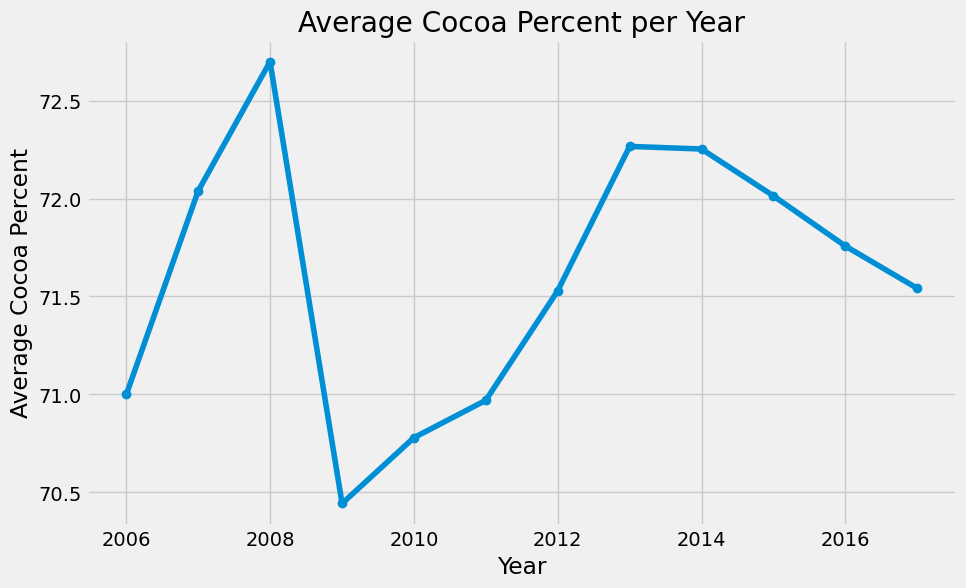

In [11]:
# Plot line chart

plt.figure(figsize=(10, 6))
plt.plot(avg_cocoa_per_year.index, avg_cocoa_per_year, marker='o', linestyle='-')
plt.title('Average Cocoa Percent per Year')
plt.xlabel('Year')
plt.ylabel('Average Cocoa Percent')
plt.grid(True)
plt.show()

In [12]:
# Group by year and find the average 'Rating' for each year

avg_rating_per_year = df.groupby(df.index)['Rating'].mean()

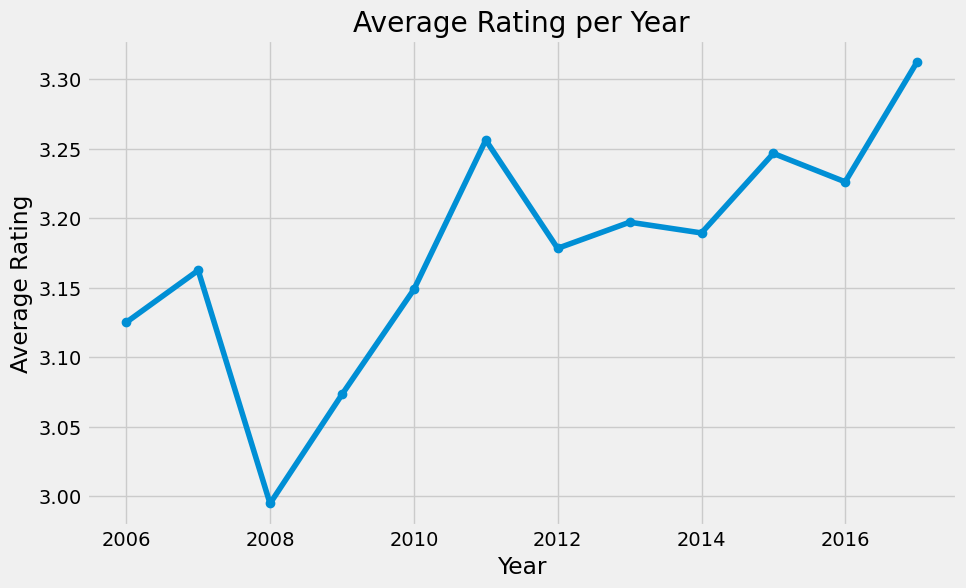

In [13]:
# Plot line chart

plt.figure(figsize=(10, 6))
plt.plot(avg_rating_per_year.index, avg_rating_per_year, marker='o', linestyle='-')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Decomposition

In [15]:
# Resample the time series to yearly frequency

time_series = df['Cocoa Percent'].resample('Y').mean()

In [16]:
# Decompose the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(time_series, model='multiplicative')

In [17]:
# Access trend, seasonal, and residual components

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

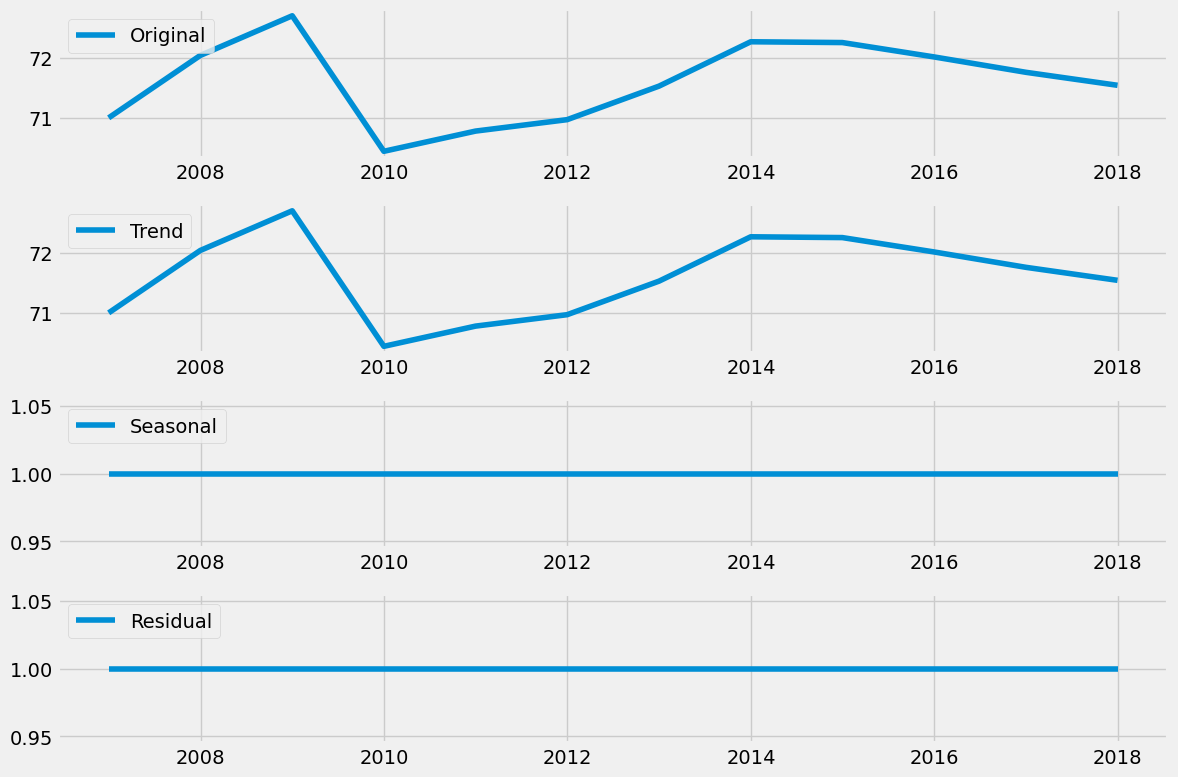

In [18]:
# Plot the components

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

This plot shows the average cocoa percent of every year. The original line is smooth because I don't have that many year values and all of the averages are quite close together, therefore the trend line is almost identical. There is no seasonal trends because I only have year data. The residual line shows that there is no unexplained noise.

In [19]:
# Resample the time series

time_series_rating = df['Rating'].resample('Y').mean()

In [20]:
# Decompose the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(time_series_rating, model='multiplicative')

In [21]:
# Access trend, seasonal, and residual components

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

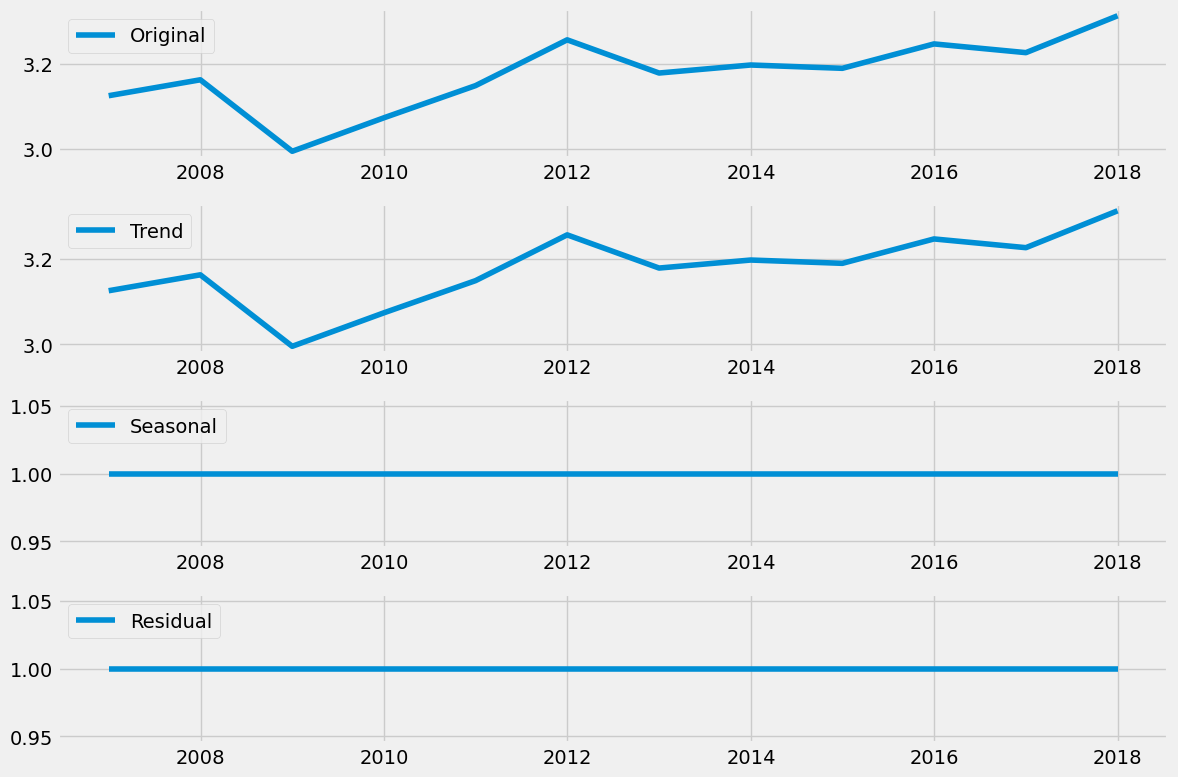

In [22]:
# Plot the components

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series_rating, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

For 'Rating', the results are similar to 'Cocoa Percent', there is no seasonal trends and no unexplained noise. The original line is also already pretty smooth so the trend line is almost the identical.

## 4. Testing for stationarity

#### Cocoa Percent

In [24]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(time_series): 
    
    # Perform Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(time_series, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Cocoa Percent'])


Dickey-Fuller Stationarity test:
Test Statistic                -1.736973e+01
p-value                        5.146113e-30
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
Critical Value (10%)          -2.567630e+00
dtype: float64


The test statistic is strongly negative, this gives evidence against the null hypothesis of non-stationarity. The p-value being close to 0 also indicates evidence against the null hypothesis. The critical values as well support the rejection of the null hypothesis because the test statistic value is more extreme than the critical values. All of this shows the time series is stationary.

#### Rating

In [26]:
# Define the function
def dickey_fuller(time_series_rating): 
    
    # Perform Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(time_series_rating, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Rating'])


Dickey-Fuller Stationarity test:
Test Statistic                -1.654759e+01
p-value                        1.958247e-29
Number of Lags Used            3.000000e+00
Number of Observations Used    1.791000e+03
Critical Value (1%)           -3.434006e+00
Critical Value (5%)           -2.863155e+00
Critical Value (10%)          -2.567630e+00
dtype: float64


The output is very similar to the output of 'Cocoa Percent'. The test statistic is strongly negative, the p-value is close to 0, and the test statistic is more extreme than the critical values. This shows that the time series is stationary.

### Check autocorrelation

#### Cocoa Percent

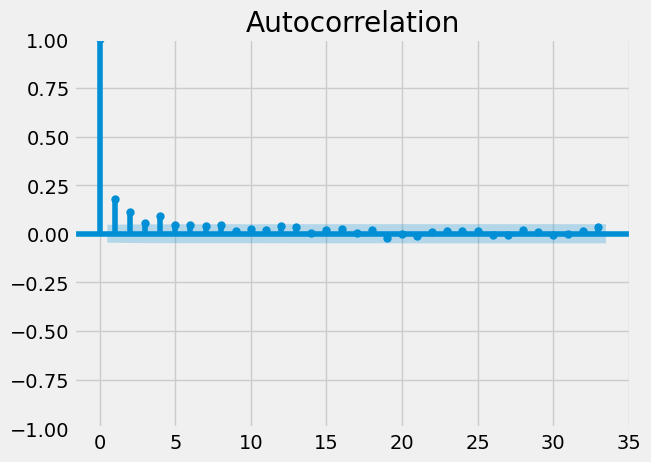

In [29]:
# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 


plot_acf(df['Cocoa Percent'])
plt.show()

#### Rating

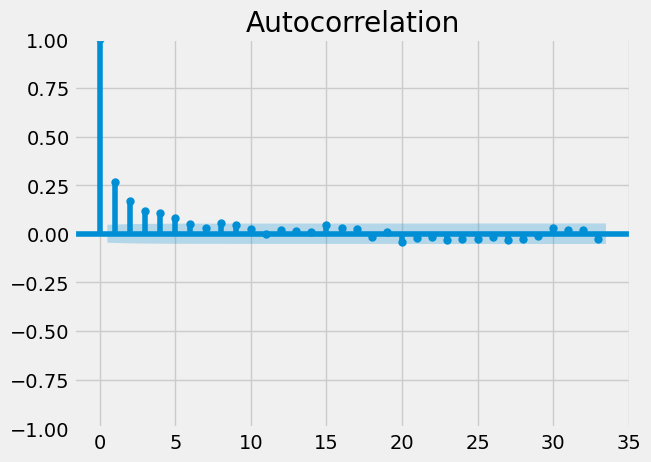

In [30]:
plot_acf(df['Rating'])
plt.show()